# Student performance - Portuguese

In [1]:
#Import library
import numpy as np
import pandas as pd
import random
from utils import distance, fairness_calculation, generate_data, f_cost, plot_analysis
from experiment import experiment_baseline, run_experiment_baseline, experiment_knapsack, run_experiment_knapsack, experiment_mfc_knapsack, run_experiment_mfc_knapsack,experiment_CPLEX, run_experiment_CPLEX
import matplotlib.pyplot as plt
import math

In [2]:
#data = pd.read_csv('student-por.csv',sep=";")
#url = 'student-por-synthetic-h3.csv'
n_wishes = 3
n_topic = 325 #1/2 data 
#df_generate = generate_data(data,len(data), n_wishes, n_topic,file=url)

D:\FairEdu\knapsack\MFC-knapsack h3\utils.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[name]=None
D:\FairEdu\knapsack\MFC-knapsack h3\utils.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[name][j]= random.randint(1,n_topic)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
D:\FairEdu\knapsack

In [3]:
df = pd.read_csv('student-por-synthetic-h3.csv')

## Heuristic

In [4]:
#Parameters
min_of_min_cap = 2
max_of_min_cap = 18
diff_cap = 1
alpha = 1
beta = 1
protected_att = "sex"
male = 'M'

In [5]:
def balance_score(data,protected_att,male):
    n_student_m = len(data[data[protected_att]==male])
    n_student_f = len(df) - n_student_m
    print("female:",n_student_f)
    print("male:",n_student_m)
    return (min(n_student_f,n_student_m)/max(n_student_f,n_student_m))

In [6]:
balance_score(df,protected_att,male)

female: 383
male: 266


0.6945169712793734

In [7]:
base_curr_min_cap, base_curr_nash, base_curr_satisfied, base_curr_balances, base_curr_capacities , base_curr_n_clusters, base_curr_count_instances, base_curr_tracking = run_experiment_baseline(df, n_wishes, n_topic, min_of_min_cap, max_of_min_cap, diff_cap = diff_cap,protected_att = protected_att,male = male,  alpha = alpha, beta = beta, verbose = True)

D:\FairEdu\knapsack\MFC-knapsack h3\experiment.py:130: RuntimeWarning: invalid value encountered in double_scalars
  w[i][j] = (w[i][j] * 1.0) / (w_max[j] * 1.0)


Time taken for min of capacity 2 : 2.886 seconds.
Time taken for min of capacity 3 : 2.413 seconds.
Time taken for min of capacity 4 : 2.166 seconds.
Time taken for min of capacity 5 : 2.406 seconds.
Time taken for min of capacity 6 : 2.261 seconds.
Time taken for min of capacity 7 : 2.422 seconds.
Time taken for min of capacity 8 : 2.407 seconds.
Time taken for min of capacity 9 : 2.301 seconds.
Time taken for min of capacity 10 : 2.393 seconds.
Time taken for min of capacity 11 : 2.378 seconds.
Time taken for min of capacity 12 : 2.306 seconds.
Time taken for min of capacity 13 : 2.379 seconds.
Time taken for min of capacity 14 : 2.338 seconds.
Time taken for min of capacity 15 : 2.435 seconds.
Time taken for min of capacity 16 : 2.364 seconds.
Time taken for min of capacity 17 : 2.457 seconds.
Time taken for min of capacity 18 : 2.432 seconds.


In [8]:
base_curr_nash_log = [math.log(base_curr_nash[id],base_curr_n_clusters[id]) for id in range(len(base_curr_nash))]

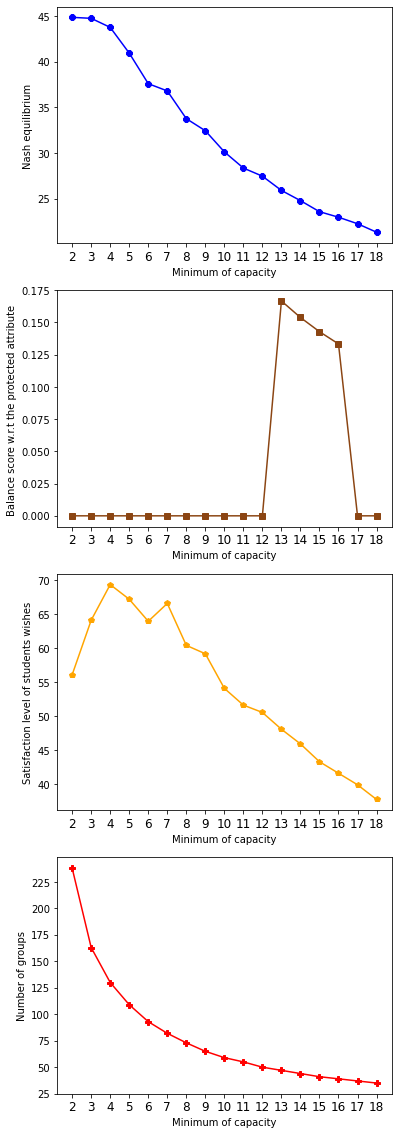

In [9]:
plot_analysis(base_curr_min_cap, base_curr_nash_log, base_curr_balances, base_curr_satisfied, base_curr_n_clusters, step_size=1, file_name = 'Student-mat-Baseline_nash_balance_satisfied_wish_3_topic_100.pdf')

## Baseline CPLEX

In [10]:
dataname = 'student-por'
base_cplex_curr_min_cap, base_cplex_curr_nash, base_cplex_curr_satisfied, base_cplex_curr_balances, base_cplex_curr_capacities , base_cplex_curr_n_clusters, base_cplex_curr_count_instances, base_cplex_curr_tracking = run_experiment_CPLEX(dataname,df, n_wishes, n_topic, min_of_min_cap, max_of_min_cap, diff_cap = diff_cap,protected_att = protected_att,male = male,  alpha = alpha, beta = beta, verbose = True)
base_cplex_curr_nash_log = [math.log(base_cplex_curr_nash[id],base_cplex_curr_n_clusters[id]) if base_cplex_curr_n_clusters[id]>1 else np.nan for id in range(len(base_cplex_curr_nash))]

D:\FairEdu\knapsack\MFC-knapsack h3\experiment.py:390: RuntimeWarning: invalid value encountered in double_scalars
  w[i][j] = (w[i][j] * 1.0) / (w_max[j] * 1.0)


Time taken for min of capacity 2 : 1.569 seconds.
Time taken for min of capacity 3 : 1.768 seconds.
Time taken for min of capacity 4 : 1.750 seconds.
Time taken for min of capacity 5 : 1.773 seconds.
Time taken for min of capacity 6 : 1.619 seconds.
Time taken for min of capacity 7 : 1.674 seconds.
Time taken for min of capacity 8 : 1.985 seconds.
Time taken for min of capacity 9 : 1.978 seconds.
Time taken for min of capacity 10 : 12.159 seconds.
Time taken for min of capacity 11 : 10.793 seconds.
Time taken for min of capacity 12 : 9.213 seconds.
Time taken for min of capacity 13 : 8.771 seconds.
Time taken for min of capacity 14 : 6.024 seconds.
Time taken for min of capacity 15 : 3.567 seconds.
Time taken for min of capacity 16 : 3.025 seconds.
Time taken for min of capacity 17 : 2.407 seconds.
Time taken for min of capacity 18 : 1.944 seconds.


## Knapsack

In [11]:
knapsack_curr_min_cap, knapsack_curr_nash, knapsack_curr_satisfied, knapsack_curr_balances, knapsack_curr_capacities , knapsack_curr_n_clusters, knapsack_curr_count_instances, knapsack_curr_tracking = run_experiment_knapsack(df, n_wishes, n_topic, min_of_min_cap, max_of_min_cap, diff_cap = diff_cap, protected_att = 'sex',male = 'M',alpha = 1, beta = 1, verbose = True)

D:\FairEdu\knapsack\MFC-knapsack h3\experiment.py:222: RuntimeWarning: invalid value encountered in double_scalars
  w[i][j] = (w[i][j] * 1.0) / (w_max[j] * 1.0)


Time taken for min of capacity 2 : 2.666 seconds.
Time taken for min of capacity 3 : 2.593 seconds.
Time taken for min of capacity 4 : 2.639 seconds.
Time taken for min of capacity 5 : 2.492 seconds.
Time taken for min of capacity 6 : 2.686 seconds.
Time taken for min of capacity 7 : 3.014 seconds.
Time taken for min of capacity 8 : 3.041 seconds.
Time taken for min of capacity 9 : 3.062 seconds.
Time taken for min of capacity 10 : 3.109 seconds.
Time taken for min of capacity 11 : 3.331 seconds.
Time taken for min of capacity 12 : 3.689 seconds.
Time taken for min of capacity 13 : 3.548 seconds.
Time taken for min of capacity 14 : 3.856 seconds.
Time taken for min of capacity 15 : 3.944 seconds.
Time taken for min of capacity 16 : 3.998 seconds.
Time taken for min of capacity 17 : 3.716 seconds.
Time taken for min of capacity 18 : 3.202 seconds.


In [12]:
knapsack_curr_nash_log = [math.log(knapsack_curr_nash[id],knapsack_curr_n_clusters[id]) for id in range(len(knapsack_curr_nash))]

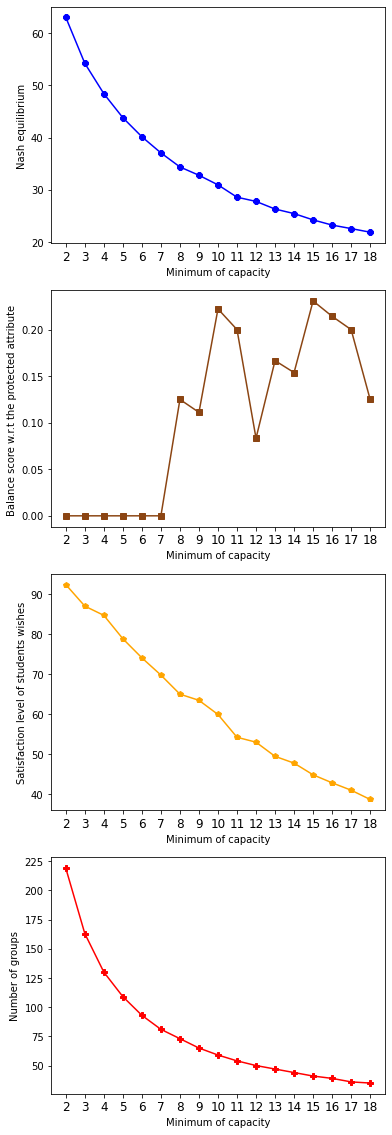

In [13]:
plot_analysis(knapsack_curr_min_cap, knapsack_curr_nash_log, knapsack_curr_balances, knapsack_curr_satisfied, knapsack_curr_n_clusters, step_size=1, file_name = 'Student-mat-Knapsack_nash_balance_satisfied_wish_3_topic_100.pdf')

## MFC knapsack

In [14]:
mfc_knapsack_curr_min_cap, mfc_knapsack_curr_nash, mfc_knapsack_curr_satisfied, mfc_knapsack_curr_balances, mfc_knapsack_curr_capacities , mfc_knapsack_curr_n_clusters, mfc_knapsack_curr_count_instances, mfc_knapsack_curr_tracking = run_experiment_mfc_knapsack(df, n_wishes, n_topic, max_of_min_cap, diff_cap = diff_cap, protected_att = 'sex',male = 'M',theta = balance_score(df,protected_att,male), alpha = 1, beta = 1,  verbose = True)

female: 383
male: 266


D:\FairEdu\knapsack\MFC-knapsack h3\experiment.py:304: RuntimeWarning: invalid value encountered in double_scalars
  w[i][j] = (w[i][j] * 1.0) / (w_max[j] * 1.0)


Time taken for min of capacity 2 : 4.152 seconds.
Time taken for min of capacity 3 : 4.901 seconds.
Time taken for min of capacity 4 : 6.135 seconds.
Time taken for min of capacity 5 : 5.739 seconds.
Time taken for min of capacity 6 : 7.017 seconds.
Time taken for min of capacity 7 : 6.922 seconds.
Time taken for min of capacity 8 : 7.240 seconds.
Time taken for min of capacity 9 : 7.969 seconds.
Time taken for min of capacity 10 : 8.219 seconds.
Time taken for min of capacity 11 : 7.872 seconds.
Time taken for min of capacity 12 : 9.100 seconds.
Time taken for min of capacity 13 : 9.502 seconds.
Time taken for min of capacity 14 : 9.906 seconds.
Time taken for min of capacity 15 : 10.209 seconds.
Time taken for min of capacity 16 : 10.596 seconds.
Time taken for min of capacity 17 : 11.282 seconds.
Time taken for min of capacity 18 : 11.544 seconds.


In [15]:
mfc_knapsack_curr_nash_log = [math.log(mfc_knapsack_curr_nash[id],mfc_knapsack_curr_n_clusters[id]) for id in range(len(mfc_knapsack_curr_nash))]

## Comparison plot

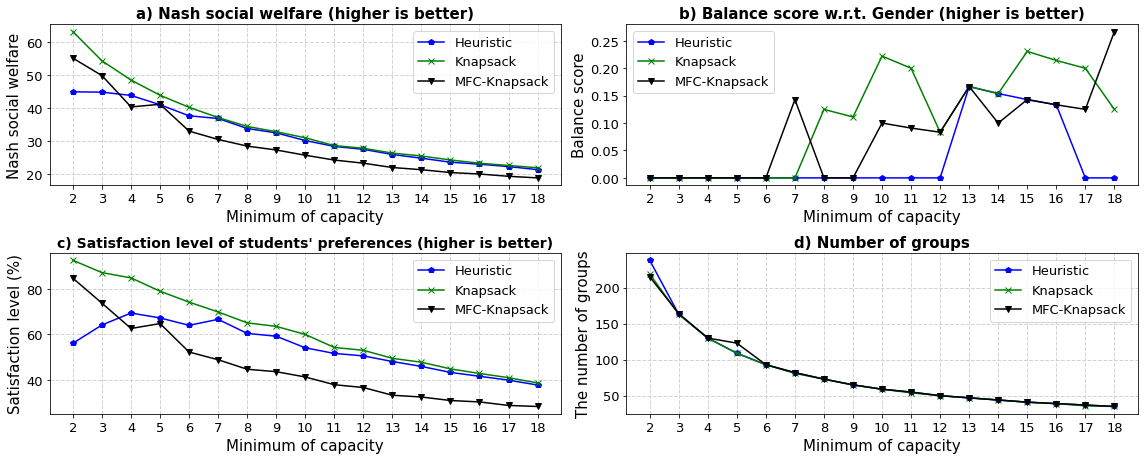

In [40]:
xticks = [i for i in range(min_of_min_cap, max_of_min_cap+1)]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 6.5)) #(16, 9) before
ax[0,0].grid(color='lightgrey', linestyle='--', linewidth=1)
#Nash equilibrium 
#ax[0,0].plot(base_cplex_curr_nash_log, marker='d', color='orange', label="CPLEX")
ax[0,0].plot(base_curr_nash_log, marker='p', color='blue', label="Heuristic")
ax[0,0].plot(knapsack_curr_nash_log, marker='x', color='green', label="Knapsack")
ax[0,0].plot(mfc_knapsack_curr_nash_log, marker='v', color='black', label="MFC-Knapsack")
ax[0,0].set_xticks(list(range(0, len(xticks), 1))) 
ax[0,0].set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=13)
ax[0,0].yaxis.set_tick_params(labelsize=13)
ax[0,0].set_title("a) Nash social welfare (higher is better)",fontdict={'fontsize': 15, 'fontweight': 'bold'})
ax[0,0].set_xlabel("Minimum of capacity",fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax[0,0].set_ylabel("Nash social welfare",fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax[0,0].legend(fontsize=13)

#Balance score wrt protected attribute 
#ax[0,1].grid(color='lightgrey', linestyle='--', linewidth=1)
#ax[0,1].plot(base_cplex_curr_balances, marker='d', color='orange', label="CPLEX")
ax[0,1].plot(base_curr_balances, marker='p', color='blue', label="Heuristic")
ax[0,1].plot(knapsack_curr_balances, marker='x', color='green', label="Knapsack")
ax[0,1].plot(mfc_knapsack_curr_balances, marker='v', color='black', label="MFC-Knapsack")
ax[0,1].set_xticks(list(range(0, len(xticks), 1))) 
ax[0,1].set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=13)
ax[0,1].yaxis.set_tick_params(labelsize=13)
ax[0,1].set_title("b) Balance score w.r.t. Gender (higher is better)",fontdict={'fontsize': 15, 'fontweight': 'bold'})
ax[0,1].set_xlabel("Minimum of capacity",fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax[0,1].set_ylabel("Balance score",fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax[0,1].legend(fontsize=13)

#Satisfaction level 
ax[1,0].grid(color='lightgrey', linestyle='--', linewidth=1)
#ax[1,0].plot(base_cplex_curr_satisfied, marker='d', color='orange', label="CPLEX")
ax[1,0].plot(base_curr_satisfied, marker='p', color='blue', label="Heuristic")
ax[1,0].plot(knapsack_curr_satisfied, marker='x', color='green', label="Knapsack")
ax[1,0].plot(mfc_knapsack_curr_satisfied, marker='v', color='black', label="MFC-Knapsack")
ax[1,0].set_xticks(list(range(0, len(xticks), 1))) 
ax[1,0].set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=13)
ax[1,0].yaxis.set_tick_params(labelsize=13)
ax[1,0].set_title("c) Satisfaction level of students' preferences (higher is better)",fontdict={'fontsize': 14,'fontweight': 'bold'})
ax[1,0].set_xlabel("Minimum of capacity",fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax[1,0].set_ylabel("Satisfaction level (%)",fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax[1,0].legend(fontsize=13)

#Number of groups
ax[1,1].grid(color='lightgrey', linestyle='--', linewidth=1)
#ax[1,1].plot(base_cplex_curr_n_clusters, marker='d', color='orange', label="CPLEX")
ax[1,1].plot(base_curr_n_clusters, marker='p', color='blue', label="Heuristic")
ax[1,1].plot(knapsack_curr_n_clusters, marker='x', color='green', label="Knapsack")
ax[1,1].plot(mfc_knapsack_curr_n_clusters, marker='v', color='black', label="MFC-Knapsack")
ax[1,1].set_xticks(list(range(0, len(xticks), 1))) 
ax[1,1].set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=13)
ax[1,1].yaxis.set_tick_params(labelsize=13)
ax[1,1].set_title("d) Number of groups",fontdict={'fontsize': 15, 'fontweight': 'bold'})
ax[1,1].set_xlabel("Minimum of capacity",fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax[1,1].set_ylabel("The number of groups",fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax[1,1].legend(fontsize=13)
plt.tight_layout()
plt.savefig('Plot_student_por.pdf',bbox_inches='tight')
plt.show()

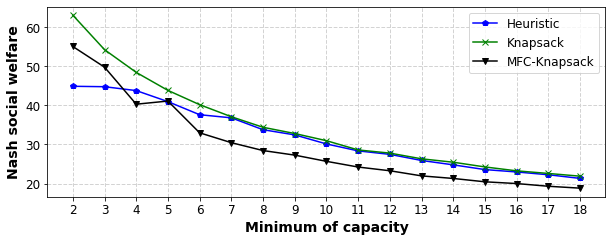

In [38]:
xticks = [i for i in range(min_of_min_cap, max_of_min_cap+1)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3.5)) #(16, 9) before
ax.grid(color='lightgrey', linestyle='--', linewidth=1)
#Nash equilibrium 
#ax.plot(base_cplex_curr_nash_log, marker='d', color='orange', label="CPLEX")
ax.plot(base_curr_nash_log, marker='p', color='blue', label="Heuristic")
ax.plot(knapsack_curr_nash_log, marker='x', color='green', label="Knapsack")
ax.plot(mfc_knapsack_curr_nash_log, marker='v', color='black', label="MFC-Knapsack")
ax.set_xticks(list(range(0, len(xticks), 1))) 
ax.set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=12)
ax.yaxis.set_tick_params(labelsize=12)
#ax.set_title("a) Nash social welfare (higher is better)",fontdict={'fontsize': 15, 'fontweight': 'bold'})
ax.set_xlabel("Minimum of capacity",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.set_ylabel("Nash social welfare",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.legend(fontsize=12)
plt.savefig('mfc.Plot_student_por.Nash.pdf',bbox_inches='tight')
plt.show()

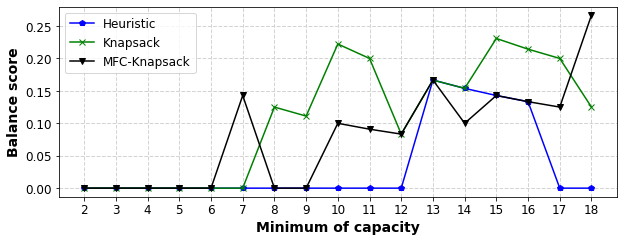

In [37]:
xticks = [i for i in range(min_of_min_cap, max_of_min_cap+1)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3.5)) 
#Balance score wrt protected attribute 
ax.grid(color='lightgrey', linestyle='--', linewidth=1)
#ax.plot(base_cplex_curr_balances, marker='d', color='orange', label="CPLEX")
ax.plot(base_curr_balances, marker='p', color='blue', label="Heuristic")
ax.plot(knapsack_curr_balances, marker='x', color='green', label="Knapsack")
ax.plot(mfc_knapsack_curr_balances, marker='v', color='black', label="MFC-Knapsack")
ax.set_xticks(list(range(0, len(xticks), 1))) 
ax.set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=12)
ax.yaxis.set_tick_params(labelsize=12)
#ax[0,1].set_title("b) Balance score w.r.t. Gender (higher is better)",fontdict={'fontsize': 15, 'fontweight': 'bold'})
ax.set_xlabel("Minimum of capacity",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.set_ylabel("Balance score",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.legend(fontsize=12)
plt.savefig('mfc.Plot_student_por.Balance.pdf',bbox_inches='tight')
plt.show()

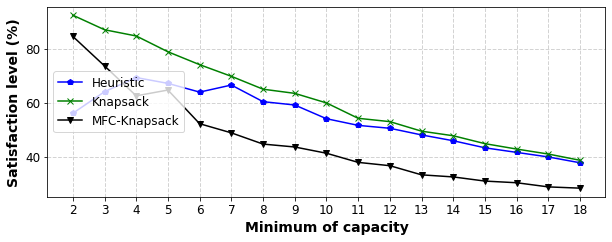

In [36]:
xticks = [i for i in range(min_of_min_cap, max_of_min_cap+1)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3.5)) 
#Satisfaction level 
ax.grid(color='lightgrey', linestyle='--', linewidth=1)
#ax.plot(base_cplex_curr_satisfied, marker='d', color='orange', label="CPLEX")
ax.plot(base_curr_satisfied, marker='p', color='blue', label="Heuristic")
ax.plot(knapsack_curr_satisfied, marker='x', color='green', label="Knapsack")
ax.plot(mfc_knapsack_curr_satisfied, marker='v', color='black', label="MFC-Knapsack")
ax.set_xticks(list(range(0, len(xticks), 1))) 
ax.set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=12)
ax.yaxis.set_tick_params(labelsize=12)
#ax.set_title("c) Satisfaction level of students' preferences (higher is better)",fontdict={'fontsize': 14,'fontweight': 'bold'})
ax.set_xlabel("Minimum of capacity",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.set_ylabel("Satisfaction level (%)",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.legend(fontsize=12,loc='center left')
plt.savefig('mfc.Plot_student_por.Satisfaction.pdf',bbox_inches='tight')
plt.show()

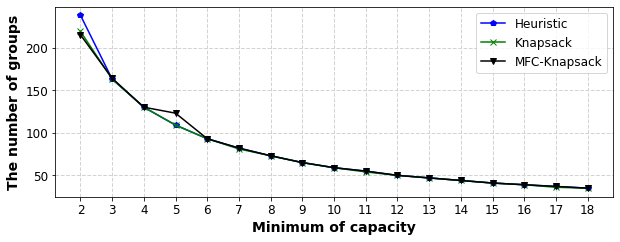

In [35]:
xticks = [i for i in range(min_of_min_cap, max_of_min_cap+1)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3.5)) 
#Number of groups
ax.grid(color='lightgrey', linestyle='--', linewidth=1)
#ax.plot(base_cplex_curr_n_clusters, marker='d', color='orange', label="CPLEX")
ax.plot(base_curr_n_clusters, marker='p', color='blue', label="Heuristic")
ax.plot(knapsack_curr_n_clusters, marker='x', color='green', label="Knapsack")
ax.plot(mfc_knapsack_curr_n_clusters, marker='v', color='black', label="MFC-Knapsack")
ax.set_xticks(list(range(0, len(xticks), 1))) 
ax.set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=12)
ax.yaxis.set_tick_params(labelsize=12)
#ax[1,1].set_title("d) Number of groups",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.set_xlabel("Minimum of capacity",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.set_ylabel("The number of groups",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.legend(fontsize=12)
plt.savefig('mfc.Plot_student_por.Number.pdf',bbox_inches='tight')
plt.show()

# Effect of parameters

In [21]:
alpha = 0.1
beta = 1
knapsack_curr_min_cap01, knapsack_curr_nash01, knapsack_curr_satisfied01, knapsack_curr_balances01, knapsack_curr_capacities01 , knapsack_curr_n_clusters01, knapsack_curr_count_instances01, knapsack_curr_tracking01 = run_experiment_knapsack(df, n_wishes, n_topic, min_of_min_cap, max_of_min_cap, diff_cap = diff_cap, protected_att = 'sex',male = 'M',alpha = alpha, beta = beta, verbose = True)
knapsack_curr_nash_log01 = [math.log(knapsack_curr_nash01[id],knapsack_curr_n_clusters01[id]) for id in range(len(knapsack_curr_nash01))]

D:\FairEdu\knapsack\MFC-knapsack h3\experiment.py:222: RuntimeWarning: invalid value encountered in double_scalars
  w[i][j] = (w[i][j] * 1.0) / (w_max[j] * 1.0)


Time taken for min of capacity 2 : 1.971 seconds.
Time taken for min of capacity 3 : 1.990 seconds.
Time taken for min of capacity 4 : 1.956 seconds.
Time taken for min of capacity 5 : 2.024 seconds.
Time taken for min of capacity 6 : 2.236 seconds.
Time taken for min of capacity 7 : 2.285 seconds.
Time taken for min of capacity 8 : 2.236 seconds.
Time taken for min of capacity 9 : 2.328 seconds.
Time taken for min of capacity 10 : 2.405 seconds.
Time taken for min of capacity 11 : 2.437 seconds.
Time taken for min of capacity 12 : 2.620 seconds.
Time taken for min of capacity 13 : 2.864 seconds.
Time taken for min of capacity 14 : 3.458 seconds.
Time taken for min of capacity 15 : 2.999 seconds.
Time taken for min of capacity 16 : 3.165 seconds.
Time taken for min of capacity 17 : 3.184 seconds.
Time taken for min of capacity 18 : 3.185 seconds.


In [22]:
alpha = 0.5
beta = 1
knapsack_curr_min_cap51, knapsack_curr_nash51, knapsack_curr_satisfied51, knapsack_curr_balances51, knapsack_curr_capacities51 , knapsack_curr_n_clusters51, knapsack_curr_count_instances51, knapsack_curr_tracking51 = run_experiment_knapsack(df, n_wishes, n_topic, min_of_min_cap, max_of_min_cap, diff_cap = diff_cap, protected_att = 'sex',male = 'M',alpha = alpha, beta = beta, verbose = True)
knapsack_curr_nash_log51 = [math.log(knapsack_curr_nash51[id],knapsack_curr_n_clusters51[id]) for id in range(len(knapsack_curr_nash51))]

Time taken for min of capacity 2 : 1.992 seconds.
Time taken for min of capacity 3 : 2.016 seconds.
Time taken for min of capacity 4 : 1.975 seconds.
Time taken for min of capacity 5 : 2.129 seconds.
Time taken for min of capacity 6 : 2.165 seconds.
Time taken for min of capacity 7 : 2.409 seconds.
Time taken for min of capacity 8 : 2.647 seconds.
Time taken for min of capacity 9 : 2.432 seconds.
Time taken for min of capacity 10 : 2.406 seconds.
Time taken for min of capacity 11 : 2.580 seconds.
Time taken for min of capacity 12 : 2.771 seconds.
Time taken for min of capacity 13 : 2.726 seconds.
Time taken for min of capacity 14 : 2.809 seconds.
Time taken for min of capacity 15 : 2.927 seconds.
Time taken for min of capacity 16 : 3.001 seconds.
Time taken for min of capacity 17 : 3.089 seconds.
Time taken for min of capacity 18 : 3.363 seconds.


In [23]:
alpha = 1
beta = 0.1
knapsack_curr_min_cap10, knapsack_curr_nash10, knapsack_curr_satisfied10, knapsack_curr_balances10, knapsack_curr_capacities10 , knapsack_curr_n_clusters10, knapsack_curr_count_instances10, knapsack_curr_tracking10 = run_experiment_knapsack(df, n_wishes, n_topic, min_of_min_cap, max_of_min_cap, diff_cap = diff_cap, protected_att = 'sex',male = 'M',alpha = alpha, beta = beta, verbose = True)
knapsack_curr_nash_log10 = [math.log(knapsack_curr_nash10[id],knapsack_curr_n_clusters10[id]) for id in range(len(knapsack_curr_nash10))]

Time taken for min of capacity 2 : 2.030 seconds.
Time taken for min of capacity 3 : 2.222 seconds.
Time taken for min of capacity 4 : 2.094 seconds.
Time taken for min of capacity 5 : 2.246 seconds.
Time taken for min of capacity 6 : 2.125 seconds.
Time taken for min of capacity 7 : 2.356 seconds.
Time taken for min of capacity 8 : 2.341 seconds.
Time taken for min of capacity 9 : 2.329 seconds.
Time taken for min of capacity 10 : 2.630 seconds.
Time taken for min of capacity 11 : 3.380 seconds.
Time taken for min of capacity 12 : 2.759 seconds.
Time taken for min of capacity 13 : 2.866 seconds.
Time taken for min of capacity 14 : 2.957 seconds.
Time taken for min of capacity 15 : 3.099 seconds.
Time taken for min of capacity 16 : 3.262 seconds.
Time taken for min of capacity 17 : 3.350 seconds.
Time taken for min of capacity 18 : 3.770 seconds.


In [24]:
alpha = 1
beta = 0.5
knapsack_curr_min_cap15, knapsack_curr_nash15, knapsack_curr_satisfied15, knapsack_curr_balances15, knapsack_curr_capacities15 , knapsack_curr_n_clusters15, knapsack_curr_count_instances15, knapsack_curr_tracking15 = run_experiment_knapsack(df, n_wishes, n_topic, min_of_min_cap, max_of_min_cap, diff_cap = diff_cap, protected_att = 'sex',male = 'M',alpha = alpha, beta = beta, verbose = True)
knapsack_curr_nash_log15 = [math.log(knapsack_curr_nash15[id],knapsack_curr_n_clusters15[id]) for id in range(len(knapsack_curr_nash15))]

Time taken for min of capacity 2 : 2.341 seconds.
Time taken for min of capacity 3 : 2.912 seconds.
Time taken for min of capacity 4 : 2.199 seconds.
Time taken for min of capacity 5 : 2.423 seconds.
Time taken for min of capacity 6 : 2.141 seconds.
Time taken for min of capacity 7 : 2.559 seconds.
Time taken for min of capacity 8 : 2.358 seconds.
Time taken for min of capacity 9 : 2.418 seconds.
Time taken for min of capacity 10 : 2.481 seconds.
Time taken for min of capacity 11 : 2.441 seconds.
Time taken for min of capacity 12 : 2.628 seconds.
Time taken for min of capacity 13 : 2.788 seconds.
Time taken for min of capacity 14 : 2.838 seconds.
Time taken for min of capacity 15 : 2.983 seconds.
Time taken for min of capacity 16 : 3.075 seconds.
Time taken for min of capacity 17 : 3.125 seconds.
Time taken for min of capacity 18 : 3.291 seconds.


In [25]:
alpha = 1
beta = 1
knapsack_curr_min_cap11, knapsack_curr_nash11, knapsack_curr_satisfied11, knapsack_curr_balances11, knapsack_curr_capacities11 , knapsack_curr_n_clusters11, knapsack_curr_count_instances11, knapsack_curr_tracking11 = run_experiment_knapsack(df, n_wishes, n_topic, min_of_min_cap, max_of_min_cap, diff_cap = diff_cap, protected_att = 'sex',male = 'M',alpha = alpha, beta = beta, verbose = True)
knapsack_curr_nash_log11 = [math.log(knapsack_curr_nash11[id],knapsack_curr_n_clusters11[id]) for id in range(len(knapsack_curr_nash11))]

Time taken for min of capacity 2 : 2.301 seconds.
Time taken for min of capacity 3 : 2.143 seconds.
Time taken for min of capacity 4 : 2.021 seconds.
Time taken for min of capacity 5 : 2.072 seconds.
Time taken for min of capacity 6 : 2.573 seconds.
Time taken for min of capacity 7 : 3.151 seconds.
Time taken for min of capacity 8 : 2.618 seconds.
Time taken for min of capacity 9 : 2.551 seconds.
Time taken for min of capacity 10 : 2.582 seconds.
Time taken for min of capacity 11 : 2.566 seconds.
Time taken for min of capacity 12 : 2.915 seconds.
Time taken for min of capacity 13 : 2.802 seconds.
Time taken for min of capacity 14 : 2.875 seconds.
Time taken for min of capacity 15 : 2.944 seconds.
Time taken for min of capacity 16 : 3.040 seconds.
Time taken for min of capacity 17 : 3.147 seconds.
Time taken for min of capacity 18 : 3.254 seconds.


In [26]:
alpha = 0.1
beta = 0.1
knapsack_curr_min_cap00, knapsack_curr_nash00, knapsack_curr_satisfied00, knapsack_curr_balances00, knapsack_curr_capacities00 , knapsack_curr_n_clusters00, knapsack_curr_count_instances00, knapsack_curr_tracking00 = run_experiment_knapsack(df, n_wishes, n_topic, min_of_min_cap, max_of_min_cap, diff_cap = diff_cap, protected_att = 'sex',male = 'M',alpha = alpha, beta = beta, verbose = True)
knapsack_curr_nash_log00 = [math.log(knapsack_curr_nash00[id],knapsack_curr_n_clusters00[id]) for id in range(len(knapsack_curr_nash00))]

Time taken for min of capacity 2 : 1.990 seconds.
Time taken for min of capacity 3 : 1.956 seconds.
Time taken for min of capacity 4 : 1.983 seconds.
Time taken for min of capacity 5 : 2.040 seconds.
Time taken for min of capacity 6 : 2.120 seconds.
Time taken for min of capacity 7 : 2.190 seconds.
Time taken for min of capacity 8 : 2.323 seconds.
Time taken for min of capacity 9 : 2.326 seconds.
Time taken for min of capacity 10 : 2.425 seconds.
Time taken for min of capacity 11 : 2.481 seconds.
Time taken for min of capacity 12 : 2.572 seconds.
Time taken for min of capacity 13 : 2.697 seconds.
Time taken for min of capacity 14 : 2.801 seconds.
Time taken for min of capacity 15 : 2.921 seconds.
Time taken for min of capacity 16 : 3.483 seconds.
Time taken for min of capacity 17 : 3.469 seconds.
Time taken for min of capacity 18 : 3.481 seconds.


In [27]:
alpha = 0.5
beta = 0.5
knapsack_curr_min_cap55, knapsack_curr_nash55, knapsack_curr_satisfied55, knapsack_curr_balances55, knapsack_curr_capacities55 , knapsack_curr_n_clusters55, knapsack_curr_count_instances55, knapsack_curr_tracking55 = run_experiment_knapsack(df, n_wishes, n_topic, min_of_min_cap, max_of_min_cap, diff_cap = diff_cap, protected_att = 'sex',male = 'M',alpha = alpha, beta = beta, verbose = True)
knapsack_curr_nash_log55 = [math.log(knapsack_curr_nash55[id],knapsack_curr_n_clusters55[id]) for id in range(len(knapsack_curr_nash55))]

Time taken for min of capacity 2 : 2.187 seconds.
Time taken for min of capacity 3 : 2.337 seconds.
Time taken for min of capacity 4 : 2.242 seconds.
Time taken for min of capacity 5 : 2.148 seconds.
Time taken for min of capacity 6 : 2.191 seconds.
Time taken for min of capacity 7 : 2.389 seconds.
Time taken for min of capacity 8 : 2.514 seconds.
Time taken for min of capacity 9 : 2.338 seconds.
Time taken for min of capacity 10 : 2.411 seconds.
Time taken for min of capacity 11 : 2.579 seconds.
Time taken for min of capacity 12 : 2.741 seconds.
Time taken for min of capacity 13 : 3.182 seconds.
Time taken for min of capacity 14 : 3.234 seconds.
Time taken for min of capacity 15 : 2.980 seconds.
Time taken for min of capacity 16 : 3.133 seconds.
Time taken for min of capacity 17 : 3.215 seconds.
Time taken for min of capacity 18 : 3.406 seconds.


In [28]:
alpha = 0.1
beta = 0.5
knapsack_curr_min_cap05, knapsack_curr_nash05, knapsack_curr_satisfied05, knapsack_curr_balances05, knapsack_curr_capacities05 , knapsack_curr_n_clusters05, knapsack_curr_count_instances05, knapsack_curr_tracking05 = run_experiment_knapsack(df, n_wishes, n_topic, min_of_min_cap, max_of_min_cap, diff_cap = diff_cap, protected_att = 'sex',male = 'M',alpha = alpha, beta = beta, verbose = True)
knapsack_curr_nash_log05 = [math.log(knapsack_curr_nash05[id],knapsack_curr_n_clusters05[id]) for id in range(len(knapsack_curr_nash05))]

Time taken for min of capacity 2 : 2.022 seconds.
Time taken for min of capacity 3 : 2.057 seconds.
Time taken for min of capacity 4 : 2.006 seconds.
Time taken for min of capacity 5 : 2.042 seconds.
Time taken for min of capacity 6 : 2.158 seconds.
Time taken for min of capacity 7 : 2.207 seconds.
Time taken for min of capacity 8 : 2.240 seconds.
Time taken for min of capacity 9 : 2.377 seconds.
Time taken for min of capacity 10 : 2.444 seconds.
Time taken for min of capacity 11 : 2.472 seconds.
Time taken for min of capacity 12 : 2.640 seconds.
Time taken for min of capacity 13 : 2.717 seconds.
Time taken for min of capacity 14 : 2.830 seconds.
Time taken for min of capacity 15 : 2.976 seconds.
Time taken for min of capacity 16 : 3.054 seconds.
Time taken for min of capacity 17 : 3.200 seconds.
Time taken for min of capacity 18 : 3.340 seconds.


In [29]:
alpha = 0.5
beta = 0.1
knapsack_curr_min_cap50, knapsack_curr_nash50, knapsack_curr_satisfied50, knapsack_curr_balances50, knapsack_curr_capacities50 , knapsack_curr_n_clusters50, knapsack_curr_count_instances50, knapsack_curr_tracking50 = run_experiment_knapsack(df, n_wishes, n_topic, min_of_min_cap, max_of_min_cap, diff_cap = diff_cap, protected_att = 'sex',male = 'M',alpha = alpha, beta = beta, verbose = True)
knapsack_curr_nash_log50 = [math.log(knapsack_curr_nash50[id],knapsack_curr_n_clusters50[id]) for id in range(len(knapsack_curr_nash50))]

Time taken for min of capacity 2 : 2.015 seconds.
Time taken for min of capacity 3 : 1.991 seconds.
Time taken for min of capacity 4 : 1.959 seconds.
Time taken for min of capacity 5 : 2.039 seconds.
Time taken for min of capacity 6 : 2.125 seconds.
Time taken for min of capacity 7 : 2.607 seconds.
Time taken for min of capacity 8 : 2.274 seconds.
Time taken for min of capacity 9 : 2.354 seconds.
Time taken for min of capacity 10 : 2.410 seconds.
Time taken for min of capacity 11 : 2.493 seconds.
Time taken for min of capacity 12 : 2.622 seconds.
Time taken for min of capacity 13 : 2.739 seconds.
Time taken for min of capacity 14 : 2.829 seconds.
Time taken for min of capacity 15 : 2.946 seconds.
Time taken for min of capacity 16 : 2.967 seconds.
Time taken for min of capacity 17 : 3.473 seconds.
Time taken for min of capacity 18 : 3.474 seconds.


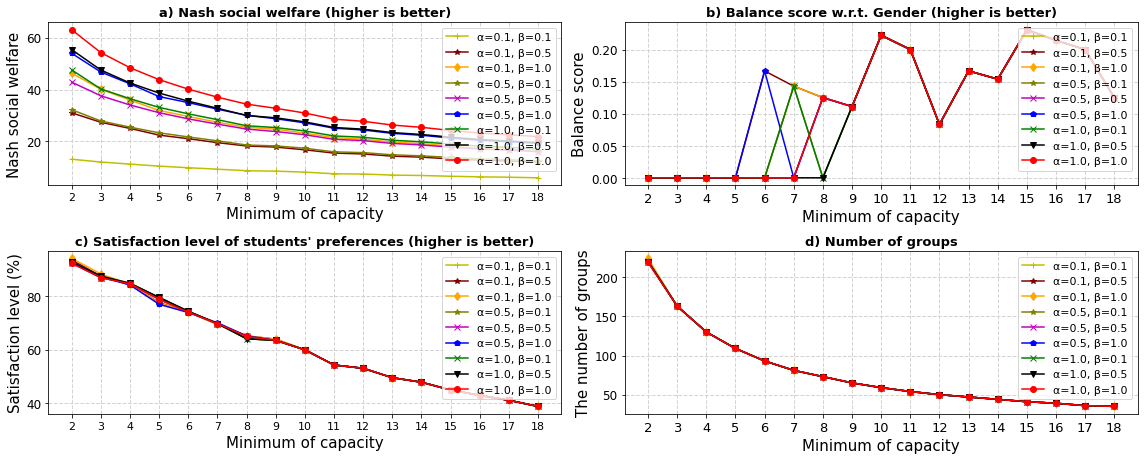

In [30]:
xticks = [i for i in range(min_of_min_cap, max_of_min_cap+1)]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 6.5))
ax[0,0].grid(color='lightgrey', linestyle='--', linewidth=1)
#Nash equilibrium
ax[0,0].plot(knapsack_curr_nash_log00, marker='+', color='y', label="\u03B1=0.1, \u03B2=0.1")
ax[0,0].plot(knapsack_curr_nash_log05, marker='*', color='maroon', label="\u03B1=0.1, \u03B2=0.5")
ax[0,0].plot(knapsack_curr_nash_log01, marker='d', color='orange', label="\u03B1=0.1, \u03B2=1.0")
ax[0,0].plot(knapsack_curr_nash_log50, marker='*', color='olive', label="\u03B1=0.5, \u03B2=0.1")
ax[0,0].plot(knapsack_curr_nash_log55, marker='x', color='m', label="\u03B1=0.5, \u03B2=0.5")
ax[0,0].plot(knapsack_curr_nash_log51, marker='p', color='blue', label="\u03B1=0.5, \u03B2=1.0")
ax[0,0].plot(knapsack_curr_nash_log10, marker='x', color='green', label="\u03B1=1.0, \u03B2=0.1")
ax[0,0].plot(knapsack_curr_nash_log15, marker='v', color='black', label="\u03B1=1.0, \u03B2=0.5")
ax[0,0].plot(knapsack_curr_nash_log11, marker='o', color='red', label="\u03B1=1.0, \u03B2=1.0")
ax[0,0].set_xticks(list(range(0, len(xticks), 1))) 
ax[0,0].set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=11)
ax[0,0].yaxis.set_tick_params(labelsize=12)
ax[0,0].set_title("a) Nash social welfare (higher is better)",fontdict={'fontsize': 13, 'fontweight': 'bold'})
ax[0,0].set_xlabel("Minimum of capacity",fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax[0,0].set_ylabel("Nash social welfare",fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax[0,0].legend(fontsize=11,loc='upper right')

#Balance score wrt protected attribute 
ax[0,1].grid(color='lightgrey', linestyle='--', linewidth=1)
ax[0,1].plot(knapsack_curr_balances00, marker='+', color='y', label="\u03B1=0.1, \u03B2=0.1")
ax[0,1].plot(knapsack_curr_balances05, marker='*', color='maroon', label="\u03B1=0.1, \u03B2=0.5")
ax[0,1].plot(knapsack_curr_balances01, marker='d', color='orange', label="\u03B1=0.1, \u03B2=1.0")
ax[0,1].plot(knapsack_curr_balances50, marker='*', color='olive', label="\u03B1=0.5, \u03B2=0.1")
ax[0,1].plot(knapsack_curr_balances55, marker='x', color='m', label="\u03B1=0.5, \u03B2=0.5")
ax[0,1].plot(knapsack_curr_balances51, marker='p', color='blue', label="\u03B1=0.5, \u03B2=1.0")
ax[0,1].plot(knapsack_curr_balances10, marker='x', color='green', label="\u03B1=1.0, \u03B2=0.1")
ax[0,1].plot(knapsack_curr_balances15, marker='v', color='black', label="\u03B1=1.0, \u03B2=0.5")
ax[0,1].plot(knapsack_curr_balances11, marker='o', color='red', label="\u03B1=1.0, \u03B2=1.0")

ax[0,1].set_xticks(list(range(0, len(xticks), 1))) 
ax[0,1].set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=13)
ax[0,1].yaxis.set_tick_params(labelsize=12)
ax[0,1].set_title("b) Balance score w.r.t. Gender (higher is better)",fontdict={'fontsize': 13, 'fontweight': 'bold'})
ax[0,1].set_xlabel("Minimum of capacity",fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax[0,1].set_ylabel("Balance score",fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax[0,1].legend(fontsize=11,loc='upper right')

#Satisfaction level 
ax[1,0].grid(color='lightgrey', linestyle='--', linewidth=1)

ax[1,0].plot(knapsack_curr_satisfied00, marker='+', color='y', label="\u03B1=0.1, \u03B2=0.1")
ax[1,0].plot(knapsack_curr_satisfied05, marker='*', color='maroon', label="\u03B1=0.1, \u03B2=0.5")
ax[1,0].plot(knapsack_curr_satisfied01, marker='d', color='orange', label="\u03B1=0.1, \u03B2=1.0")
ax[1,0].plot(knapsack_curr_satisfied50, marker='*', color='olive', label="\u03B1=0.5, \u03B2=0.1")
ax[1,0].plot(knapsack_curr_satisfied55, marker='x', color='m', label="\u03B1=0.5, \u03B2=0.5")
ax[1,0].plot(knapsack_curr_satisfied51, marker='p', color='blue', label="\u03B1=0.5, \u03B2=1.0")
ax[1,0].plot(knapsack_curr_satisfied10, marker='x', color='green', label="\u03B1=1.0, \u03B2=0.1")
ax[1,0].plot(knapsack_curr_satisfied15, marker='v', color='black', label="\u03B1=1.0, \u03B2=0.5")
ax[1,0].plot(knapsack_curr_satisfied11, marker='o', color='red', label="\u03B1=1.0, \u03B2=1.0")

ax[1,0].set_xticks(list(range(0, len(xticks), 1))) 
ax[1,0].set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=11)
ax[1,0].yaxis.set_tick_params(labelsize=12)
ax[1,0].set_title("c) Satisfaction level of students' preferences (higher is better)",fontdict={'fontsize': 13, 'fontweight': 'bold'})
ax[1,0].set_xlabel("Minimum of capacity",fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax[1,0].set_ylabel("Satisfaction level (%)",fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax[1,0].legend(fontsize=11,loc='upper right')

#Number of groups
ax[1,1].grid(color='lightgrey', linestyle='--', linewidth=1)
ax[1,1].plot(knapsack_curr_n_clusters00, marker='+', color='y', label="\u03B1=0.1, \u03B2=0.1")
ax[1,1].plot(knapsack_curr_n_clusters05, marker='*', color='maroon', label="\u03B1=0.1, \u03B2=0.5")
ax[1,1].plot(knapsack_curr_n_clusters01, marker='d', color='orange', label="\u03B1=0.1, \u03B2=1.0")
ax[1,1].plot(knapsack_curr_n_clusters50, marker='*', color='olive', label="\u03B1=0.5, \u03B2=0.1")
ax[1,1].plot(knapsack_curr_n_clusters55, marker='x', color='m', label="\u03B1=0.5, \u03B2=0.5")
ax[1,1].plot(knapsack_curr_n_clusters51, marker='p', color='blue', label="\u03B1=0.5, \u03B2=1.0")
ax[1,1].plot(knapsack_curr_n_clusters10, marker='x', color='green', label="\u03B1=1.0, \u03B2=0.1")
ax[1,1].plot(knapsack_curr_n_clusters15, marker='v', color='black', label="\u03B1=1.0, \u03B2=0.5")
ax[1,1].plot(knapsack_curr_n_clusters11, marker='o', color='red', label="\u03B1=1.0, \u03B2=1.0")

ax[1,1].set_xticks(list(range(0, len(xticks), 1))) 
ax[1,1].set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=13)
ax[1,1].yaxis.set_tick_params(labelsize=12)
ax[1,1].set_title("d) Number of groups",fontdict={'fontsize': 13, 'fontweight': 'bold'})
ax[1,1].set_xlabel("Minimum of capacity",fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax[1,1].set_ylabel("The number of groups",fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax[1,1].legend(fontsize=11,loc='upper right')
plt.tight_layout()
file_output_name = 'Plot_student_por_alpha_beta.pdf'
plt.savefig(file_output_name,bbox_inches='tight')
plt.show()

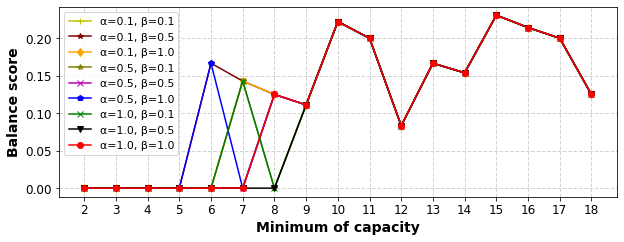

In [31]:
xticks = [i for i in range(min_of_min_cap, max_of_min_cap+1)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3.5))
#Balance score wrt protected attribute 
ax.grid(color='lightgrey', linestyle='--', linewidth=1)
ax.plot(knapsack_curr_balances00, marker='+', color='y', label="\u03B1=0.1, \u03B2=0.1")
ax.plot(knapsack_curr_balances05, marker='*', color='maroon', label="\u03B1=0.1, \u03B2=0.5")
ax.plot(knapsack_curr_balances01, marker='d', color='orange', label="\u03B1=0.1, \u03B2=1.0")
ax.plot(knapsack_curr_balances50, marker='*', color='olive', label="\u03B1=0.5, \u03B2=0.1")
ax.plot(knapsack_curr_balances55, marker='x', color='m', label="\u03B1=0.5, \u03B2=0.5")
ax.plot(knapsack_curr_balances51, marker='p', color='blue', label="\u03B1=0.5, \u03B2=1.0")
ax.plot(knapsack_curr_balances10, marker='x', color='green', label="\u03B1=1.0, \u03B2=0.1")
ax.plot(knapsack_curr_balances15, marker='v', color='black', label="\u03B1=1.0, \u03B2=0.5")
ax.plot(knapsack_curr_balances11, marker='o', color='red', label="\u03B1=1.0, \u03B2=1.0")

ax.set_xticks(list(range(0, len(xticks), 1))) 
ax.set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=12)
ax.yaxis.set_tick_params(labelsize=12)
#ax.set_title("b) Balance score w.r.t. Gender (higher is better)",fontdict={'fontsize': 13, 'fontweight': 'bold'})
ax.set_xlabel("Minimum of capacity",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.set_ylabel("Balance score",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.legend(fontsize=11,loc='upper left')
plt.savefig("mfc.Plot_student_por_alpha_beta.Balance.pdf",bbox_inches='tight')
plt.show()

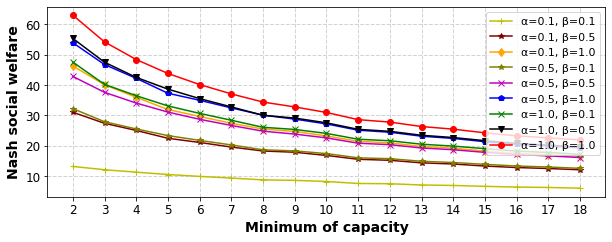

In [32]:
xticks = [i for i in range(min_of_min_cap, max_of_min_cap+1)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3.5))
ax.grid(color='lightgrey', linestyle='--', linewidth=1)
#Nash equilibrium
ax.plot(knapsack_curr_nash_log00, marker='+', color='y', label="\u03B1=0.1, \u03B2=0.1")
ax.plot(knapsack_curr_nash_log05, marker='*', color='maroon', label="\u03B1=0.1, \u03B2=0.5")
ax.plot(knapsack_curr_nash_log01, marker='d', color='orange', label="\u03B1=0.1, \u03B2=1.0")
ax.plot(knapsack_curr_nash_log50, marker='*', color='olive', label="\u03B1=0.5, \u03B2=0.1")
ax.plot(knapsack_curr_nash_log55, marker='x', color='m', label="\u03B1=0.5, \u03B2=0.5")
ax.plot(knapsack_curr_nash_log51, marker='p', color='blue', label="\u03B1=0.5, \u03B2=1.0")
ax.plot(knapsack_curr_nash_log10, marker='x', color='green', label="\u03B1=1.0, \u03B2=0.1")
ax.plot(knapsack_curr_nash_log15, marker='v', color='black', label="\u03B1=1.0, \u03B2=0.5")
ax.plot(knapsack_curr_nash_log11, marker='o', color='red', label="\u03B1=1.0, \u03B2=1.0")
ax.set_xticks(list(range(0, len(xticks), 1))) 
ax.set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=12)
ax.yaxis.set_tick_params(labelsize=12)
#ax.set_title("a) Nash social welfare (higher is better)",fontdict={'fontsize': 13, 'fontweight': 'bold'})
ax.set_xlabel("Minimum of capacity",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.set_ylabel("Nash social welfare",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.legend(fontsize=11,loc='upper right')
plt.savefig("mfc.Plot_student_por_alpha_beta.Nash.pdf",bbox_inches='tight')
plt.show()

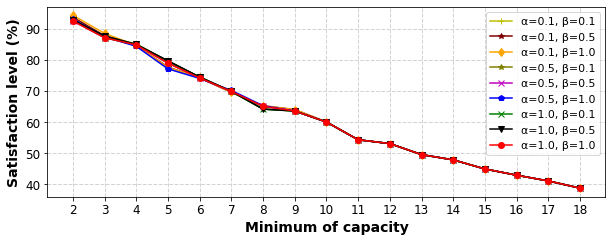

In [33]:
xticks = [i for i in range(min_of_min_cap, max_of_min_cap+1)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3.5))
#Satisfaction level 
ax.grid(color='lightgrey', linestyle='--', linewidth=1)

ax.plot(knapsack_curr_satisfied00, marker='+', color='y', label="\u03B1=0.1, \u03B2=0.1")
ax.plot(knapsack_curr_satisfied05, marker='*', color='maroon', label="\u03B1=0.1, \u03B2=0.5")
ax.plot(knapsack_curr_satisfied01, marker='d', color='orange', label="\u03B1=0.1, \u03B2=1.0")
ax.plot(knapsack_curr_satisfied50, marker='*', color='olive', label="\u03B1=0.5, \u03B2=0.1")
ax.plot(knapsack_curr_satisfied55, marker='x', color='m', label="\u03B1=0.5, \u03B2=0.5")
ax.plot(knapsack_curr_satisfied51, marker='p', color='blue', label="\u03B1=0.5, \u03B2=1.0")
ax.plot(knapsack_curr_satisfied10, marker='x', color='green', label="\u03B1=1.0, \u03B2=0.1")
ax.plot(knapsack_curr_satisfied15, marker='v', color='black', label="\u03B1=1.0, \u03B2=0.5")
ax.plot(knapsack_curr_satisfied11, marker='o', color='red', label="\u03B1=1.0, \u03B2=1.0")

ax.set_xticks(list(range(0, len(xticks), 1))) 
ax.set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=12)
ax.yaxis.set_tick_params(labelsize=12)
#ax.set_title("c) Satisfaction level of students' preferences (higher is better)",fontdict={'fontsize': 13, 'fontweight': 'bold'})
ax.set_xlabel("Minimum of capacity",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.set_ylabel("Satisfaction level (%)",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.legend(fontsize=11,loc='upper right')
plt.savefig("mfc.Plot_student_por_alpha_beta.Satisfaction.pdf",bbox_inches='tight')
plt.show()

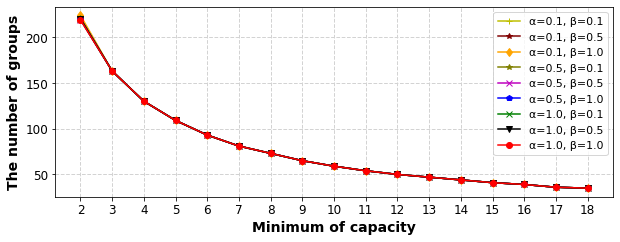

In [34]:
xticks = [i for i in range(min_of_min_cap, max_of_min_cap+1)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3.5))
#Number of groups
ax.grid(color='lightgrey', linestyle='--', linewidth=1)
ax.plot(knapsack_curr_n_clusters00, marker='+', color='y', label="\u03B1=0.1, \u03B2=0.1")
ax.plot(knapsack_curr_n_clusters05, marker='*', color='maroon', label="\u03B1=0.1, \u03B2=0.5")
ax.plot(knapsack_curr_n_clusters01, marker='d', color='orange', label="\u03B1=0.1, \u03B2=1.0")
ax.plot(knapsack_curr_n_clusters50, marker='*', color='olive', label="\u03B1=0.5, \u03B2=0.1")
ax.plot(knapsack_curr_n_clusters55, marker='x', color='m', label="\u03B1=0.5, \u03B2=0.5")
ax.plot(knapsack_curr_n_clusters51, marker='p', color='blue', label="\u03B1=0.5, \u03B2=1.0")
ax.plot(knapsack_curr_n_clusters10, marker='x', color='green', label="\u03B1=1.0, \u03B2=0.1")
ax.plot(knapsack_curr_n_clusters15, marker='v', color='black', label="\u03B1=1.0, \u03B2=0.5")
ax.plot(knapsack_curr_n_clusters11, marker='o', color='red', label="\u03B1=1.0, \u03B2=1.0")

ax.set_xticks(list(range(0, len(xticks), 1))) 
ax.set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=12)
ax.yaxis.set_tick_params(labelsize=12)
#ax.set_title("d) Number of groups",fontdict={'fontsize': 13, 'fontweight': 'bold'})
ax.set_xlabel("Minimum of capacity",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.set_ylabel("The number of groups",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.legend(fontsize=11,loc='upper right')
plt.savefig("mfc.Plot_student_por_alpha_beta.Number.pdf",bbox_inches='tight')
plt.show()